Import libraries needed

In [46]:
import json
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt



Load all the JSON files using pandas

In [47]:
df0 = pd.read_json('MyData/StreamingHistory0.json')

# view data
# print(df0)

# load second json file using pandas
df1 = pd.read_json('MyData/StreamingHistory1.json')

# view data
# print(df1)

# load third json file using pandas
df2 = pd.read_json('MyData/StreamingHistory2.json')

# view data
# print(df2)

# use pandas.concat method to combine all the json files in one
df = pd.concat([df0, df1,df2])

# view the concatenated dataframe
print(df.head())
 


            endTime     artistName                    trackName  msPlayed
0  2022-07-02 00:28           Coeo             Midnight Visions      6590
1  2022-07-02 00:28  Justin Bieber   Honest (feat. Don Toliver)     80203
2  2022-07-02 03:11        Victony                    All Power    192284
3  2022-07-02 03:12  Justin Bieber   Honest (feat. Don Toliver)     42903
4  2022-07-02 14:57     Young Jonn  Dada (feat. Davido) [Remix]    177692


convert dataframe to csv file


In [48]:
df.to_csv("myDataCombined.csv",index=False)

# load the resultant csv file
result = pd.read_csv("myDataCombined.csv")

Print and View the Data

In [49]:
print(result.head())


            endTime     artistName                    trackName  msPlayed
0  2022-07-02 00:28           Coeo             Midnight Visions      6590
1  2022-07-02 00:28  Justin Bieber   Honest (feat. Don Toliver)     80203
2  2022-07-02 03:11        Victony                    All Power    192284
3  2022-07-02 03:12  Justin Bieber   Honest (feat. Don Toliver)     42903
4  2022-07-02 14:57     Young Jonn  Dada (feat. Davido) [Remix]    177692


Top 10 listeners by month

Data Preprocessing


In [50]:
data = pd.read_csv("myDataCombined.csv")
# print(data)
# Check for null values
null_values = data.isnull().sum()

# Print the number of null values for each column
print(null_values)


endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64


Read the CSV file into a DataFrame


In [51]:
data = pd.read_csv("myDataCombined.csv")
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28995 entries, 0 to 28994
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     28995 non-null  object
 1   artistName  28995 non-null  object
 2   trackName   28995 non-null  object
 3   msPlayed    28995 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 906.2+ KB


Convert the duration of msPlayed to seconds from milliseconds 


In [52]:
data['duration_sec'] = data['msPlayed'].apply(lambda x: x / 1000)
data.drop('msPlayed', inplace = True, axis = 1)
print(data.head())



            endTime     artistName                    trackName  duration_sec
0  2022-07-02 00:28           Coeo             Midnight Visions         6.590
1  2022-07-02 00:28  Justin Bieber   Honest (feat. Don Toliver)        80.203
2  2022-07-02 03:11        Victony                    All Power       192.284
3  2022-07-02 03:12  Justin Bieber   Honest (feat. Don Toliver)        42.903
4  2022-07-02 14:57     Young Jonn  Dada (feat. Davido) [Remix]       177.692


Bar chart of the top 10 artists

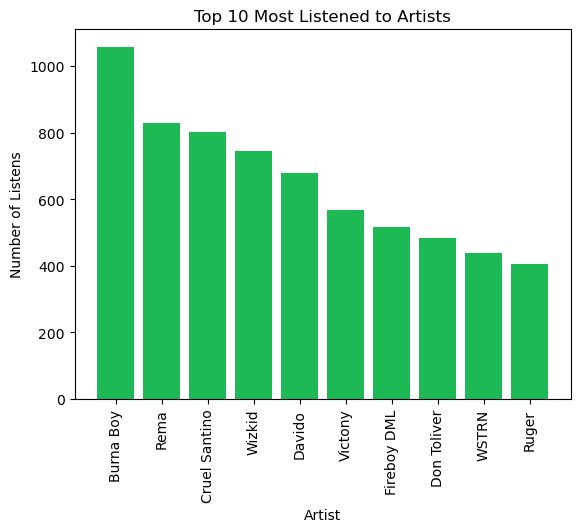

In [53]:
# Count the occurrences of each artist
artist_counts = data['artistName'].value_counts()

# Select the top 10 artists
top_10_artists = artist_counts.head(10)
spotify_green = ['#1DB954']
# Plot the bar chart for the top 10 artists
plt.bar(top_10_artists.index, top_10_artists.values, color=spotify_green)
plt.xlabel('Artist')
plt.ylabel('Number of Listens')
plt.title('Top 10 Most Listened to Artists')
plt.xticks(rotation=90)
plt.show()

Bar chart of the top 10 listened to tracks

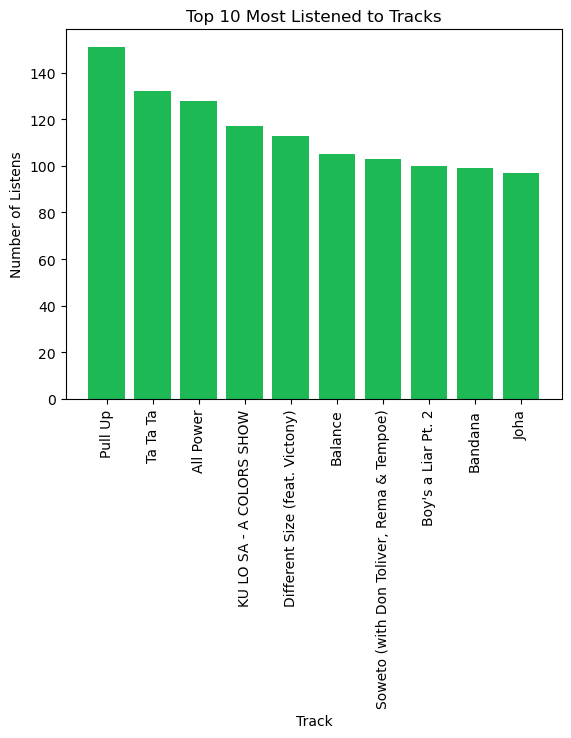

In [54]:
track_counts = data['trackName'].value_counts()

# Select the top 10 tracks
top_10_tracks = track_counts.head(10)

# Plot the bar chart for the top 10 tracks
plt.bar(top_10_tracks.index, top_10_tracks.values, color=spotify_green)
plt.xlabel('Track')
plt.ylabel('Number of Listens')
plt.title('Top 10 Most Listened to Tracks')
plt.xticks(rotation=90)
plt.show()


Categorize the data into seasons 

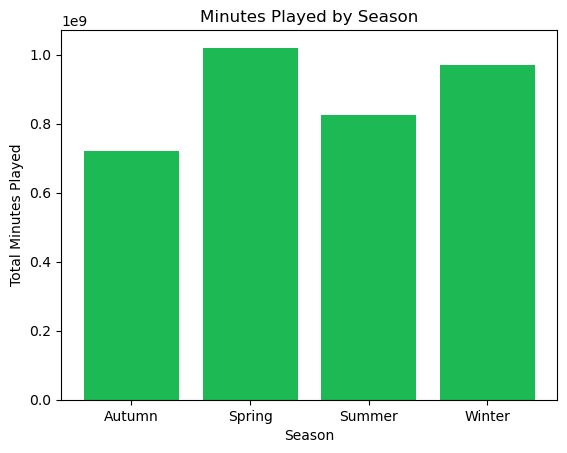

In [55]:
# Read the Spotify dataset into a DataFrame
data = pd.read_csv("myDataCombined.csv")

# Convert the date column to datetime datatype
data['endTime'] = pd.to_datetime(data['endTime'])

# Classify dates into seasons
data['season'] = data['endTime'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                                            6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn',
                                            11: 'Autumn', 12: 'Winter'})

# Calculate minutes played by converting duration from milliseconds to minutes
# data['minutes_played'] = data['duration'] / 60000

# Group the data by season and sum the minutes played
seasonal_minutes = data.groupby('season')['msPlayed'].sum()

# Plot the histogram of minutes played by season
plt.bar(seasonal_minutes.index, seasonal_minutes.values, color=spotify_green)
plt.xlabel('Season')
plt.ylabel('Total Minutes Played')
plt.title('Minutes Played by Season')
plt.show()